In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv


# Supplement Sales Project :

**The goal of this supervised learning project is to predict supplement sales categories or success levels based on various features related to product type, marketing efforts, region, price, etc. This is a classification problem, where the target variable is categorical (e.g., “High”, “Medium”, “Low” sales or “Success” vs “Fail”).**


**Project steps :**

**--> Data Loaded & Exploration (EDA)**
**--> Data Preprocessing**
**--> Modeling (classification)**
**--> Model Optimization**
**--> Results**

In [2]:
dataset = pd.read_csv('/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [4]:
dataset.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [5]:
dataset.tail()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon
4383,2025-03-31,Electrolyte Powder,Hydration,178,39.12,6963.36,0.23,0,UK,iHerb


In [6]:
dataset.describe

<bound method NDFrame.describe of             Date        Product Name     Category  Units Sold  Price  Revenue  \
0     2020-01-06        Whey Protein      Protein         143  31.98  4573.14   
1     2020-01-06           Vitamin C      Vitamin         139  42.51  5908.89   
2     2020-01-06            Fish Oil        Omega         161  12.91  2078.51   
3     2020-01-06        Multivitamin      Vitamin         140  16.07  2249.80   
4     2020-01-06         Pre-Workout  Performance         157  35.47  5568.79   
...          ...                 ...          ...         ...    ...      ...   
4379  2025-03-31           Melatonin    Sleep Aid         160  47.79  7646.40   
4380  2025-03-31              Biotin      Vitamin         154  38.12  5870.48   
4381  2025-03-31   Green Tea Extract   Fat Burner         139  20.40  2835.60   
4382  2025-03-31     Iron Supplement      Mineral         154  18.31  2819.74   
4383  2025-03-31  Electrolyte Powder    Hydration         178  39.12  6963.

In [7]:
dataset.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [8]:
dataset.dtypes

Date               object
Product Name       object
Category           object
Units Sold          int64
Price             float64
Revenue           float64
Discount          float64
Units Returned      int64
Location           object
Platform           object
dtype: object

In [9]:
dataset.shape

(4384, 10)

# Data Visualizations

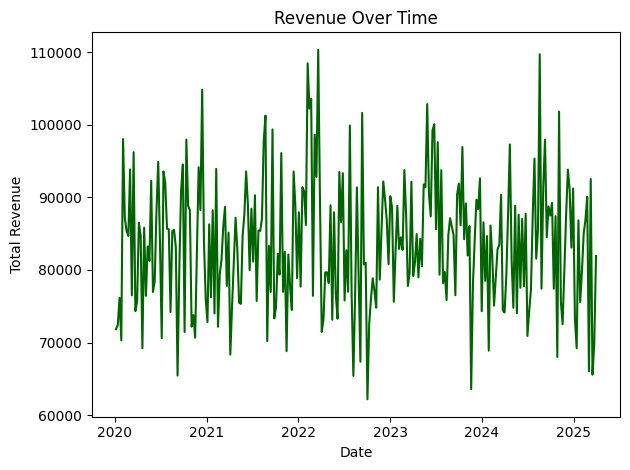

In [10]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset_time = dataset.groupby('Date')['Revenue'].sum().reset_index()

plt.figure()
sns.lineplot(data=dataset_time, x='Date', y='Revenue', color='darkgreen')
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

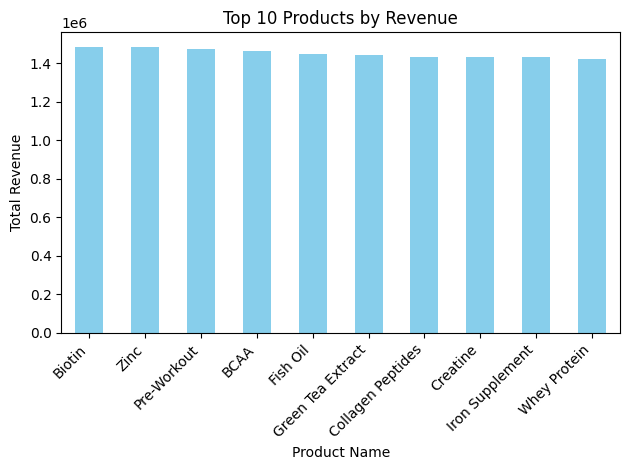

In [11]:
top_products = dataset.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure()
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

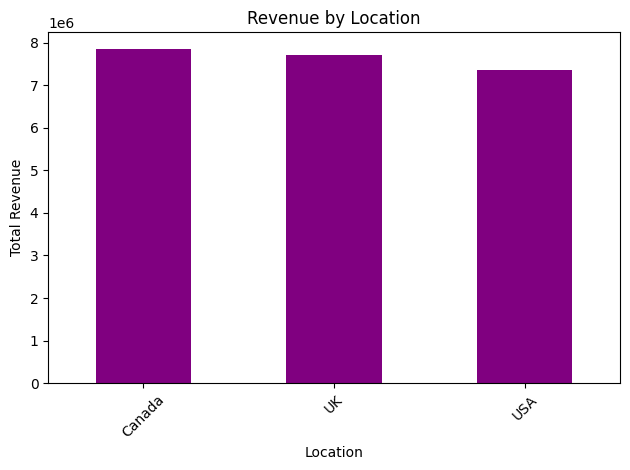

In [12]:
loc_revenue = dataset.groupby('Location')['Revenue'].sum().sort_values(ascending=False)

plt.figure()
loc_revenue.plot(kind='bar', color='purple')
plt.title("Revenue by Location")
plt.ylabel("Total Revenue")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

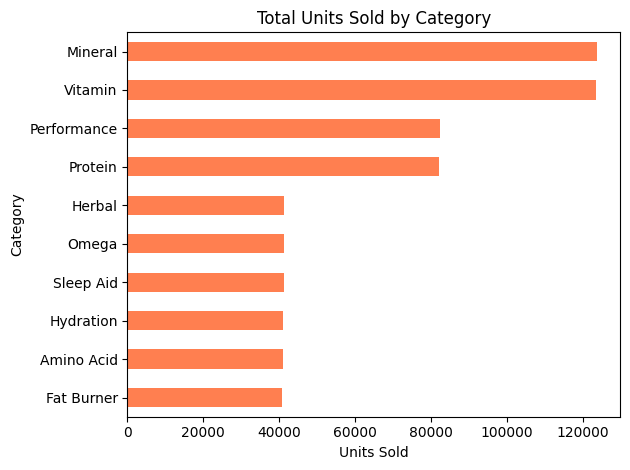

In [13]:
cat_sales = dataset.groupby('Category')['Units Sold'].sum().sort_values()
plt.figure()
cat_sales.plot(kind='barh', color='coral')
plt.title("Total Units Sold by Category")
plt.xlabel("Units Sold")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

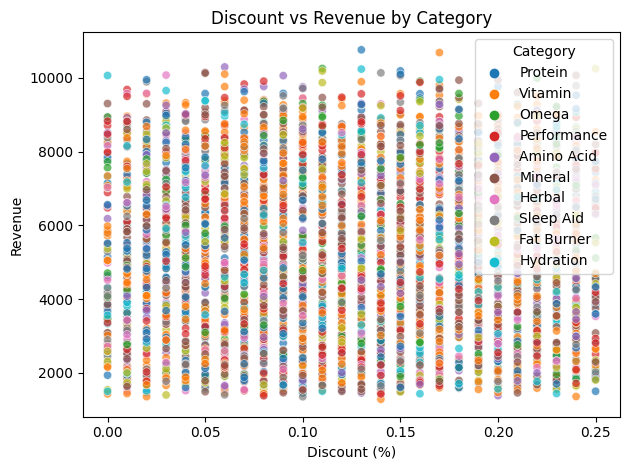

In [14]:
plt.figure()
sns.scatterplot(data=dataset, x='Discount', y='Revenue', hue='Category', alpha=0.7)
plt.title("Discount vs Revenue by Category")
plt.xlabel("Discount (%)")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

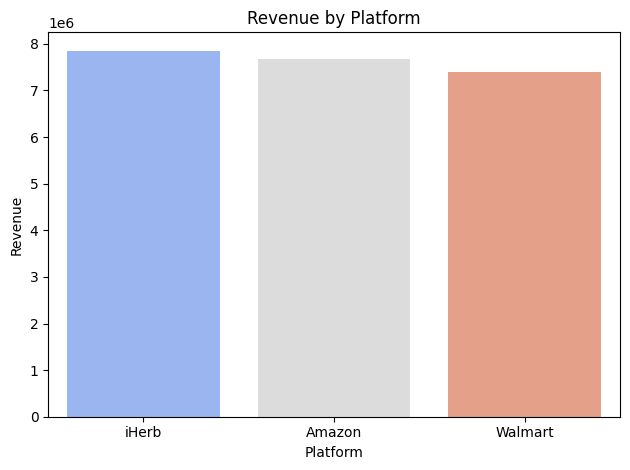

In [15]:
platform_revenue = dataset.groupby('Platform')['Revenue'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=platform_revenue.index, y=platform_revenue.values, palette='coolwarm')
plt.title("Revenue by Platform")
plt.xlabel("Platform")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# Classification Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

**Encoding**

In [17]:
# Label encoding
le = LabelEncoder()
for i in ['Category', 'Location', 'Platform']:
    dataset[i] = le.fit_transform(dataset[i])

dataset.drop(['Date', 'Product Name', 'Month', 'Year'], axis=1, inplace=True, errors='ignore')

# Features and target
X = dataset.drop(columns='Revenue')
y = dataset['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
scaler.fit(X_train)  # ✅ Correct usage
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
}

# Results
res = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_preds = model.predict(X_test_scaled)
    score = r2_score(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    
    print(f"\nPerformance: {name}")
    print(f"R² Score: {score:.4f}")
    print(f"Accuracy: {score * 100:.2f}%")
    print(f"MSE: {mse:.2f}")
    
    res.append({
        'Model': name,
        'R² Score': round(score, 4),
        'Accuracy (%)': round(score * 100, 2),
        'MSE': round(mse, 2)
    })

# Summary DataFrame
result_df = pd.DataFrame(res)
print("\n >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Models Performance Summary: <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
print(result_df)


Performance: LinearRegression
R² Score: 0.9934
Accuracy: 99.34%
MSE: 30493.02

Performance: Ridge
R² Score: 0.9934
Accuracy: 99.34%
MSE: 30480.44

Performance: RandomForest
R² Score: 0.9993
Accuracy: 99.93%
MSE: 3372.62

Performance: AdaBoost
R² Score: 0.9839
Accuracy: 98.39%
MSE: 74505.36

Performance: Bagging
R² Score: 0.9991
Accuracy: 99.91%
MSE: 3987.21

Performance: GradientBoosting
R² Score: 0.9993
Accuracy: 99.93%
MSE: 3046.31

Performance: DecisionTree
R² Score: 0.9979
Accuracy: 99.79%
MSE: 9884.77

Performance: KNN
R² Score: 0.9375
Accuracy: 93.75%
MSE: 289677.78

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>> Models Performance Summary: <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
              Model  R² Score  Accuracy (%)        MSE
0  LinearRegression    0.9934         99.34   30493.02
1             Ridge    0.9934         99.34   30480.44
2      RandomForest    0.9993         99.93    3372.62
3          AdaBoost    0.9839         98.39   74505.36
4           Bagging    0.9991         99.91    39

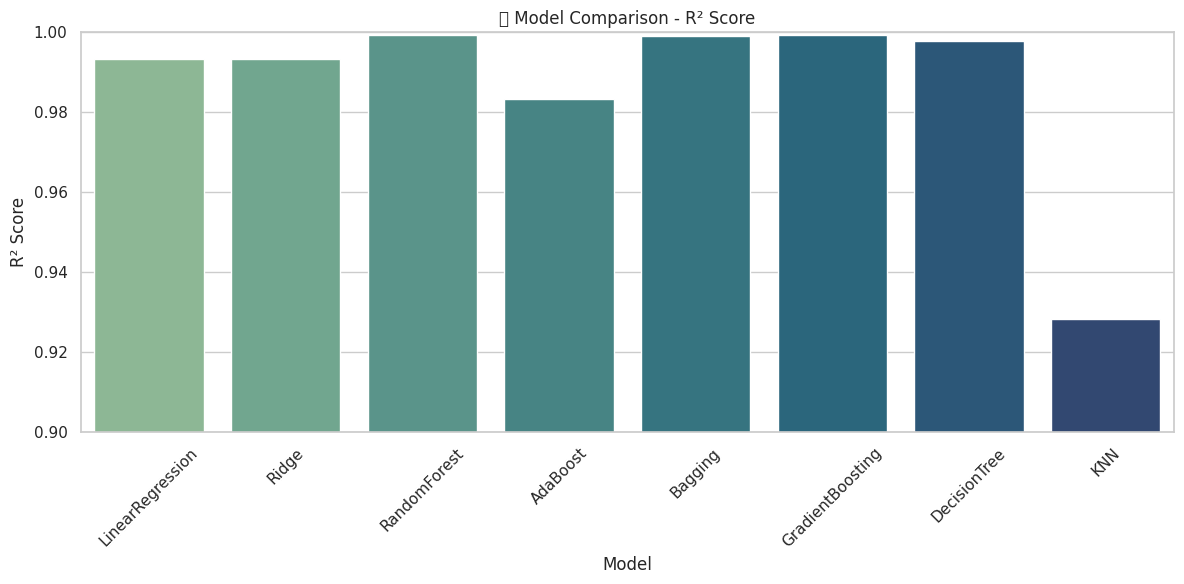

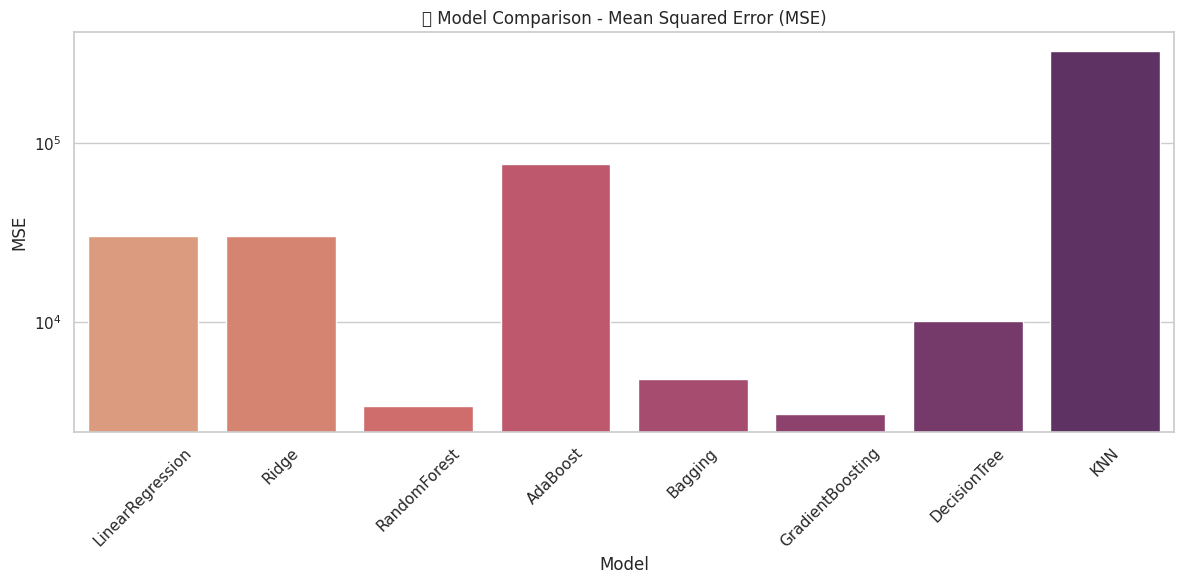

In [19]:
# Model performance summary data
summary = pd.DataFrame({
    'Model': [
        'LinearRegression', 'Ridge', 'RandomForest', 'AdaBoost',
        'Bagging', 'GradientBoosting', 'DecisionTree', 'KNN'
    ],
    'R² Score': [0.9934, 0.9934, 0.9993, 0.9834, 0.9990, 0.9993, 0.9978, 0.9284],
    'Accuracy (%)': [99.34, 99.34, 99.93, 98.34, 99.90, 99.93, 99.78, 92.84],
    'MSE': [30453.59, 30445.83, 3384.06, 76710.96, 4810.39, 3045.86, 10140.61, 331562.42]
})

# Set style
sns.set(style="whitegrid")

# Plot R² Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=summary, palette='crest')
plt.title('🔍 Model Comparison - R² Score')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=summary, palette='flare')
plt.title('🔍 Model Comparison - Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

# Ai Eng. AHMED ABU ALFTOUH METAWEA 

# THANKS